<div id="custom-style"></div>








### [<span style="color: #4CAF50; font-size: 24px; font-weight: bold;">Data Collection and Preprocessing</span>](#title-one)

* Hypotheses
* Categorical Features
* Continuous Features
* EDA Conclusion and Validating Hypotheses


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
sales_data = pd.read_csv('Salesdata.csv',  low_memory=False)
store_data = pd.read_csv('store.csv', low_memory=False)

In [3]:
# display the first five rows of the dataset
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [4]:
# display the first five rows in store-data
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# check the statistical summary of the sale data
sales_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


 Competition Open Since Month
Count: Information about the month when competition opened is available for 761 stores.
Mean (Average): On average, competition started around the 7th month (July).
Standard Deviation (std): The starting months vary, typically by about 3 months from the average.
Minimum (min): Some competition started as early as January.
25th Percentile (25%): 25% of the competition started by April.
50th Percentile (Median or 50%): Half of the competition started by August.
75th Percentile (75%): 75% of the competition started by October.
Maximum (max): The latest start was in December.

In [6]:
# check the statistical summary of the store data
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
# check duplicate entries from both dataset
sales_data.duplicated().sum(), store_data.duplicated().sum()

(0, 0)

In [8]:
# check for missing values from the datasets
print("sales_data:: \n")
print(sales_data.isna().sum())
print("______________________________")
print("store data::")
store_data.isna().sum()

sales_data:: 

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
______________________________
store data::


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

the missing values indicated in Promo2SinceWeek, Promo2SinceYear, PromoInterval columns are not actually missing value,it occured when promo2 is 0


In [9]:
# fill the missing values in "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval", indicating that no record 
list_col=["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]
for i in list_col:
    store_data[i].fillna(0, inplace=True)
    
# fill the missing values in CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occurrence 
list_col = ["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
for i in list_col:
    store_data[i].fillna(store_data[i].mode()[0], inplace=True)


# fill the missing values in CompetitionDistance with mean
mean_col = store_data["CompetitionDistance"].mean()
store_data["CompetitionDistance"].fillna(mean_col, inplace=True)

In [10]:
print("store data::")
store_data.isna().sum()

store data::


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [11]:
sales_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1


In [12]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1113,1114,a,c,870.0,9.0,2013.0,0,0.0,0.0,0


In [13]:
# conbine the two dataset
merge_df=sales_data.merge(store_data, how="left", on="Store", )
# save the two dataframe as csv
merge_df.to_csv("merge_data.csv", index=False)

In [14]:
merge_df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [15]:
# check the summary of the merge dataset
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [16]:
#from the merger, we will convert all columns that meant to be category

cat_variable = ["DayOfWeek", "Open", "Promo", "StateHoliday", "SchoolHoliday", "StoreType", "Assortment",
"PromoInterval" , "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2", "Promo2SinceWeek", "Promo2SinceYear"]

#converting neccessary columns to category datatype
for i in cat_variable:
    merge_df[i]= merge_df[i].astype("object")

# convert the Date to datetime
merge_df["Date"]=pd.to_datetime(merge_df["Date"], infer_datetime_format=True)

In [17]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  object        
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  object        
 6   Promo                      1017209 non-null  object        
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  object        
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [18]:
#
merge_df["Days"]=merge_df["Date"].dt.strftime("%a")
merge_df["Month"]=merge_df["Date"].dt.strftime("%b")
merge_df["Year"]=merge_df.Date.dt.strftime("%Y")
#merge_df.dt.strftime("%W") # week of the year as sunday as the first day

In [20]:
merge_df.to_csv("data.csv", index=False)

In [19]:
# open_rel = {0:"No", 1:"Yes"}
# merge_df["Open"]=merge_df["Open"].map(open_rel)

# Promo_rel = {0:"No", 1:"Yes"}
# merge_df["Promo"]=merge_df["Promo"].map(Promo_rel)

# SchoolHoliday_rel = {0:"No", 1:"Yes"}
# merge_df["Promo"]=merge_df["Promo"].map(SchoolHoliday_rel)

# CompetitionOpenSinceMonth_rel = {1.0:"Jan", 2.0:"Feb", 3.0:"Mar", 4.0:"Apr", 5.0:"May", 6.0:"Jun",
#                                 7.0:"Jul", 8.0:"Aug", 9.0:"Sep", 10.0:"Oct", 11.0:"Nov", 12.0:"Dec"}
# merge_df["CompetitionOpenSinceMonth"] = merge_df["CompetitionOpenSinceMonth"].map(CompetitionOpenSinceMonth_rel)

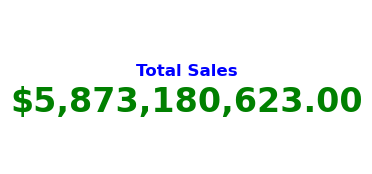

In [19]:

# Calculate the sum of the Sales column
sales_sum = merge_df["Sales"].sum()

# Format the sales_sum with commas
formatted_sales_sum = f"${sales_sum:,.2f}"

# Create a card-like plot
fig, ax = plt.subplots(figsize=(3, 2))

# Remove axes
ax.axis('off')

# Add text
ax.text(0.5, 0.6, 'Total Sales', ha='center', va='center', fontsize=12, fontweight='bold', color="blue")
ax.text(0.5, 0.4, formatted_sales_sum, ha='center', va='center', fontsize=24, fontweight='bold', color='green')

# Add a rectangle to create a card-like effect
rect = plt.Rectangle((1, 3), 3, 3, color='black', ec='black', lw=2, transform=ax.transAxes)
ax.add_patch(rect)

# Show plot
plt.show()


the Total Sales amount for the period analyzed was 5,873,100,623. this figure represent the combined revenue generated from all sales activities

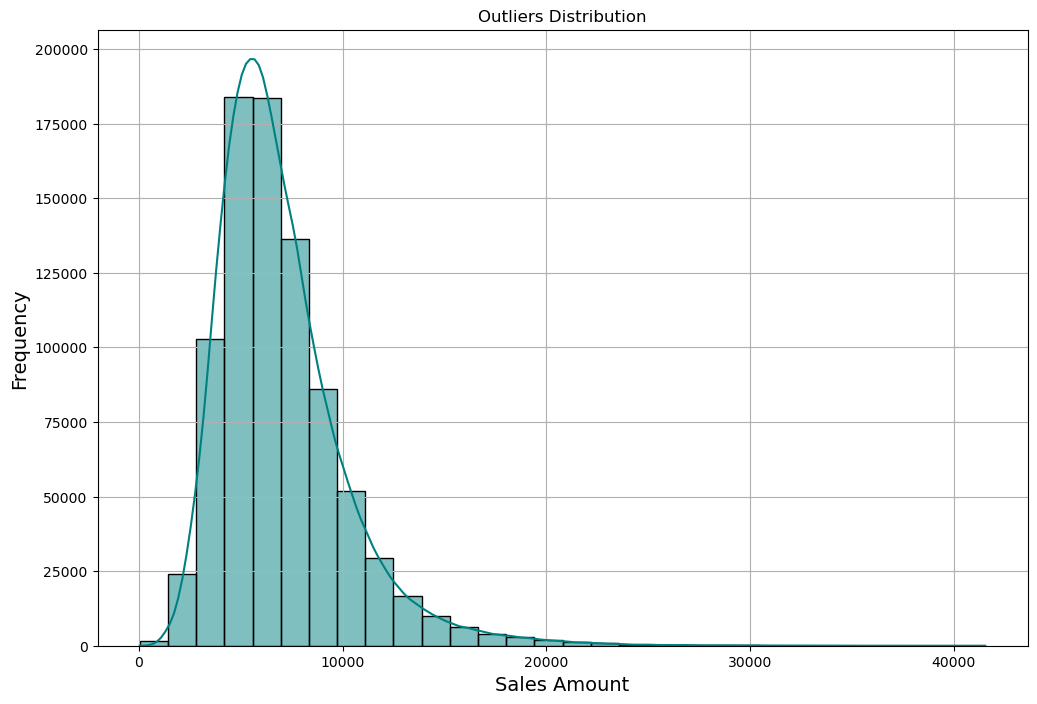

In [25]:
# Plotting the outlier distribution
plt.figure(figsize=(12, 8))
sns.histplot(merge_df[merge_df["Sales"]!=0]["Sales"], kde=True, color='teal', bins=30, edgecolor='black').set(title='Outliers Distribution')
plt.xlabel('Sales Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#plt.title('Distribution of Sales Amount Outliers', fontsize=16)
plt.grid(True)
plt.show()



### Summary:
- **Sales Amount Distribution**: The chart displays a right-skewed distribution, meaning most sales amounts are concentrated on the lower end (close to zero) and gradually decrease as the sales amount increases.
- **Frequency**: The y-axis represents the frequency, or how often certain sales amounts occur within the data. The highest frequency occurs at a sales amount range of approximately 5,000 to 10,000.
- **Outliers**: There are a few sales amounts above 30,000, which are much less frequent, indicating the presence of outliers.

This kind of distribution is common in sales data, where a large number of transactions have relatively low amounts, and fewer transactions involve significantly higher amounts.

# Univarite analysis for Category variable

In [26]:
def category_analysis(col) :
    plt.figure(figsize=(10, 6))
    index = merge_df[col].value_counts().index
    value = merge_df[col].value_counts().values
    # Calculate the sum of the column
    column_sum = value.sum()
    sns.barplot(x=index, y=value, order=index).set_title(col)

    for h, j in enumerate(value):
        plt.text(h, j, f'{(j/column_sum) * 100:.1f}%', ha="center", va="bottom", rotation=0)
    plt.text(len(index) -0.5 , max(value)+100, f'Total: {column_sum:,}', ha="right", va="bottom", color="red",
             fontsize=12, fontweight='bold')

    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.tight_layout(pad=5.0)
    plt.subplots_adjust(top=0.9)
    plt.show()

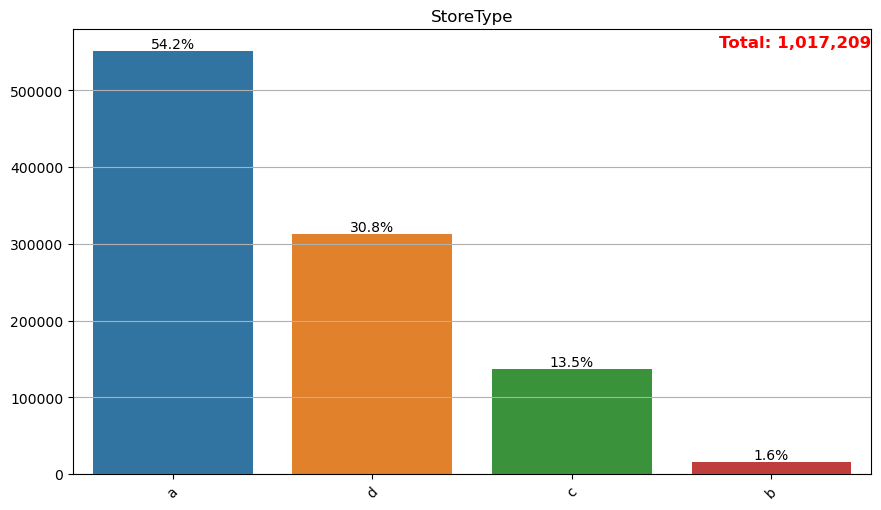

In [27]:
category_analysis("StoreType")



### Summary:
- **Store Type Distribution**:
  - **Type A**: Represents 54.2% of the total, with the highest count, around 550,000 entries.
  - **Type B**: Accounts for 30.8% of the total, with approximately 315,000 entries.
  - **Type C**: Covers 13.5% of the total, with around 135,000 entries.
  - **Type D**: Has the smallest share, 1.6%, with around 16,000 entries.

- **Total Count**: The total number of store types represented in this chart is 1,017,209.

This distribution indicates that Type A stores are the most common, followed by Type B and Type C, with Type D stores being quite rare.

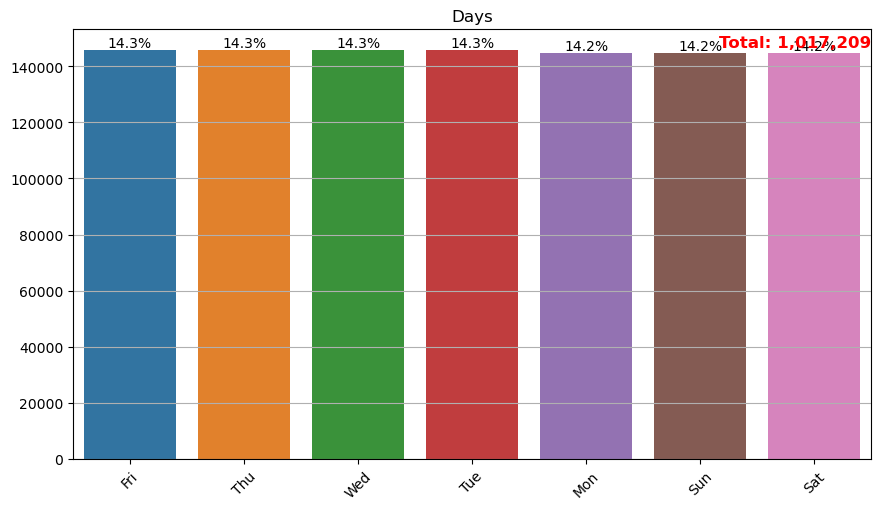

In [34]:
category_analysis("Days")

The chart is a bar graph showing the distribution of sales across different days of the week, with the total count of entries displayed at the top in red.

### Summary:
- **Daily Distribution**:
  - Each day of the week (Friday through Saturday) is represented with almost equal percentages, around 14.2% to 14.3% of the total.
  - The counts for each day are very similar, approximately 145,000 entries for each day, indicating consistent sales across the entire week.

- **Total Count**: The total number of sales entries represented in this chart is 1,017,209.

This uniform distribution suggests that sales activity is evenly spread throughout the week, with no particular day standing out as having significantly higher or lower sales.

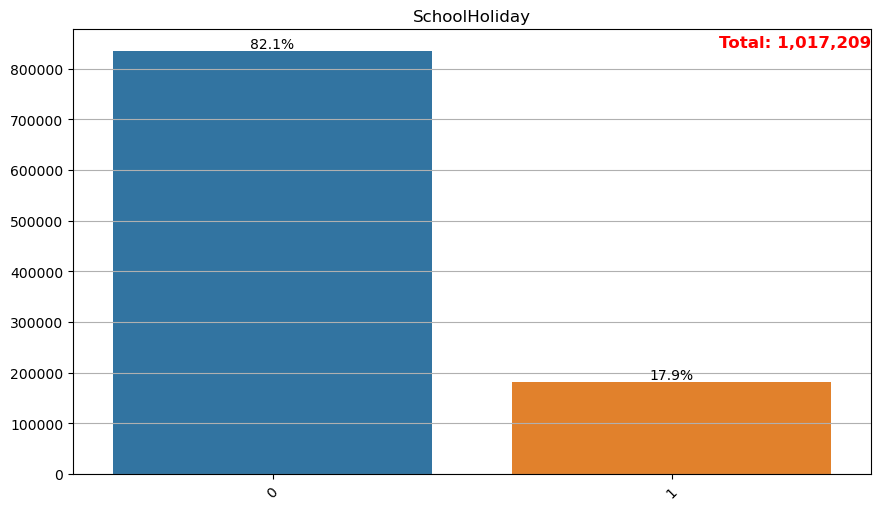

In [35]:
category_analysis("SchoolHoliday")


### Summary of the Chart:

- The bar chart represents data related to the "SchoolHoliday" variable.
- There are two categories on the x-axis: `0` (no school holiday) and `1` (school holiday).
- The category `0` (no school holiday) accounts for 82.1% of the total data, with a count slightly over 800,000.
- The category `1` (school holiday) accounts for 17.9% of the total data, with a count around 200,000.
- The total number of records is 1,017,209, as indicated by the red text in the top right corner of the chart.

### Recommendation:

Given the substantial difference in data distribution between the two categories, it is important to consider how the "SchoolHoliday" variable impacts other metrics (e.g., sales, customer traffic). Here are a few recommendations:

1. **Analysis Focus**: Given that most of the data corresponds to non-school holidays, it might be beneficial to perform separate analyses for school holidays and non-school holidays to see if there are significant differences in behavior, such as sales trends or customer traffic.

2. **Segmentation**: If the "SchoolHoliday" variable impacts key business metrics significantly, consider segmenting your data or creating a feature that captures the effect of school holidays more precisely.

3. **Reporting**: In regular reporting, emphasize the differences in performance between school holidays and regular days. This could help in planning promotional activities or optimizing resource allocation during school holidays.

4. **Further Investigation**: Investigate whether the low percentage of school holiday data is due to the actual calendar days or if there is a possibility of underreporting. This could affect the analysis if not addressed.

5. **Predictive Modeling**: When creating predictive models, ensure that the model appropriately weighs the "SchoolHoliday" variable, especially if you suspect it has a substantial impact on the target variable (e.g., sales).

These steps should help in leveraging the "SchoolHoliday" variable effectively in your analyses and decision-making processes.

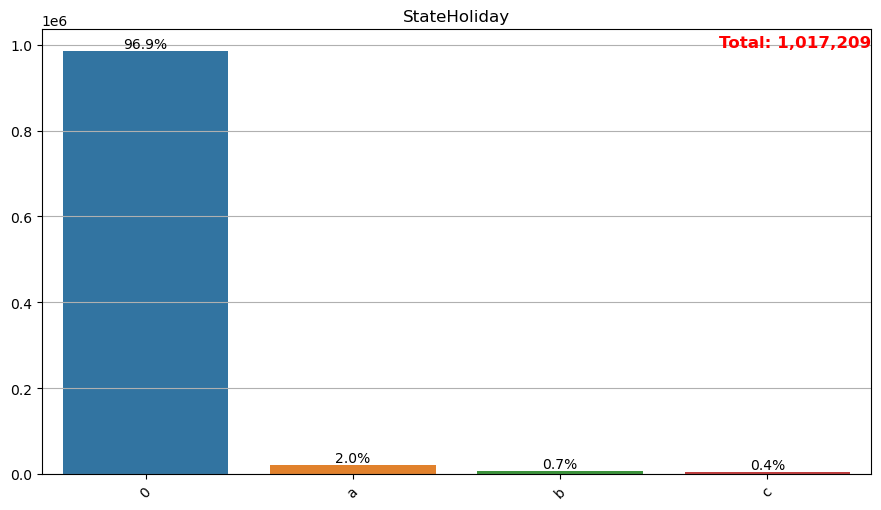

In [36]:
category_analysis("StateHoliday")


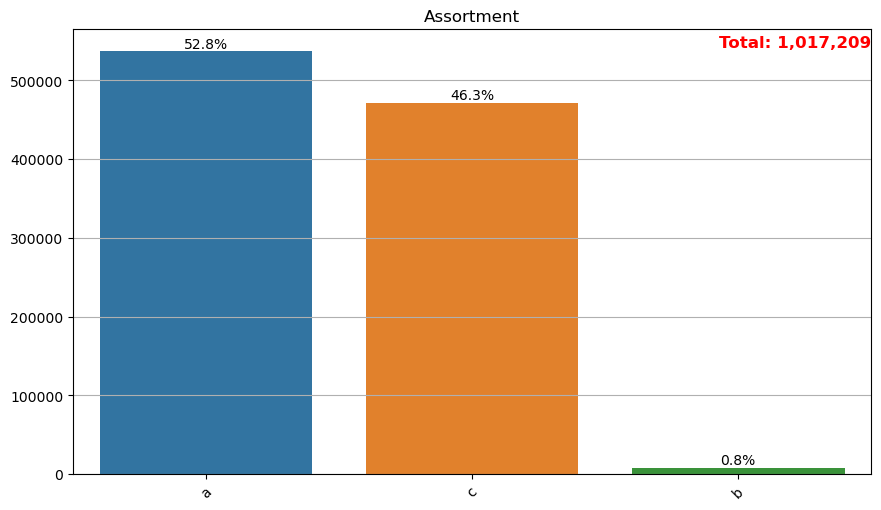

In [37]:
category_analysis("Assortment")


# Bivariate Analysis (Category and Numerical)

In [23]:
 def bivariate_cat_num(col):
    sns.set_palette("Set2")
    fig, ax = plt.subplots(figsize=(10, 6))
    ax=sns.barplot(x=merge_df[col], y=merge_df["Sales"], ci=None)
    total = [i.get_height() for i in ax.patches]

    for d,i in enumerate(total):
        plt.text(d, i-200, f'{i/sum(total)* 100:.2f}%', va="bottom", ha="center")
    plt.text(len(total)-1, max(total), f'Average Sum:{sum(total):,.2f}',  ha="right", va="bottom", color="red",
                 fontsize=12, fontweight='bold')

    ax.patch.set_color("grey")
    ax.set_title(f"Average Sales by {merge_df[col].name}")
    ax.grid(True, axis="y")
    ax.tick_params(axis='y', colors='red',labelsize=15, rotation=30) 
    plt.show()

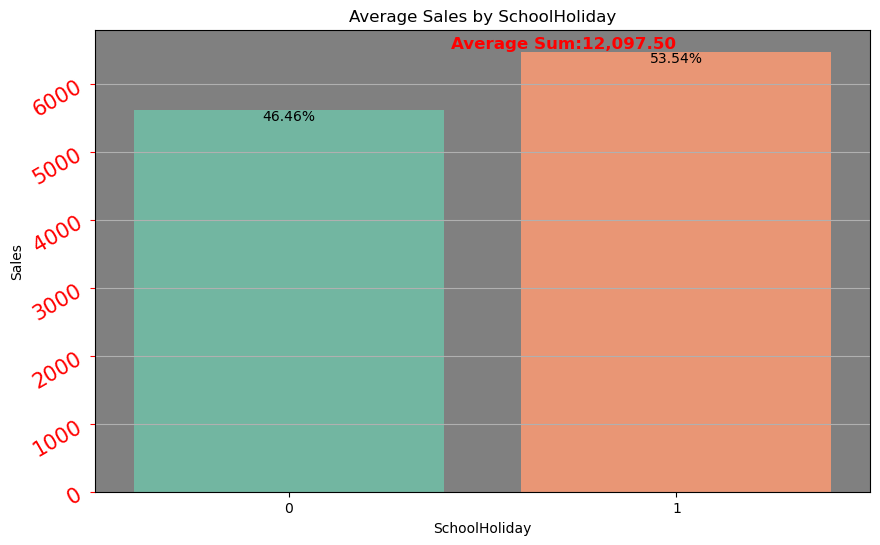

In [24]:
bivariate_cat_num("SchoolHoliday")

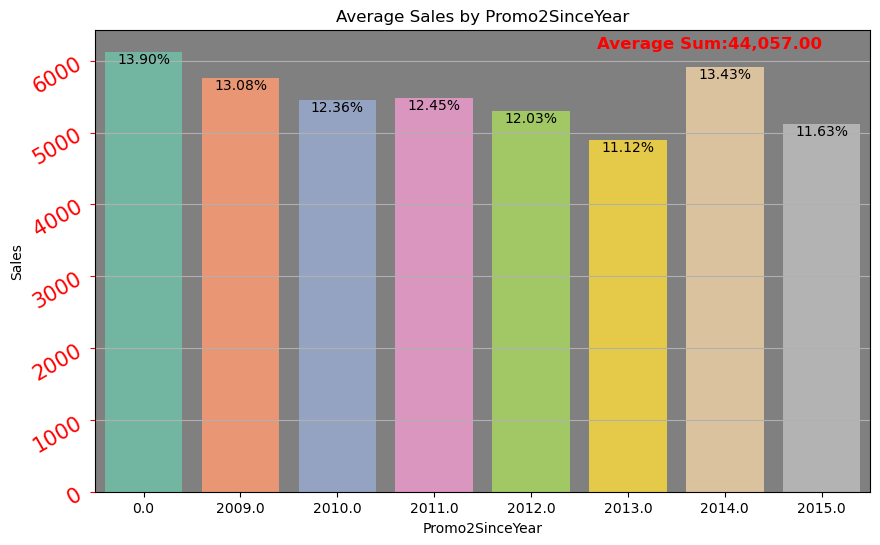

In [25]:
bivariate_cat_num("Promo2SinceYear")

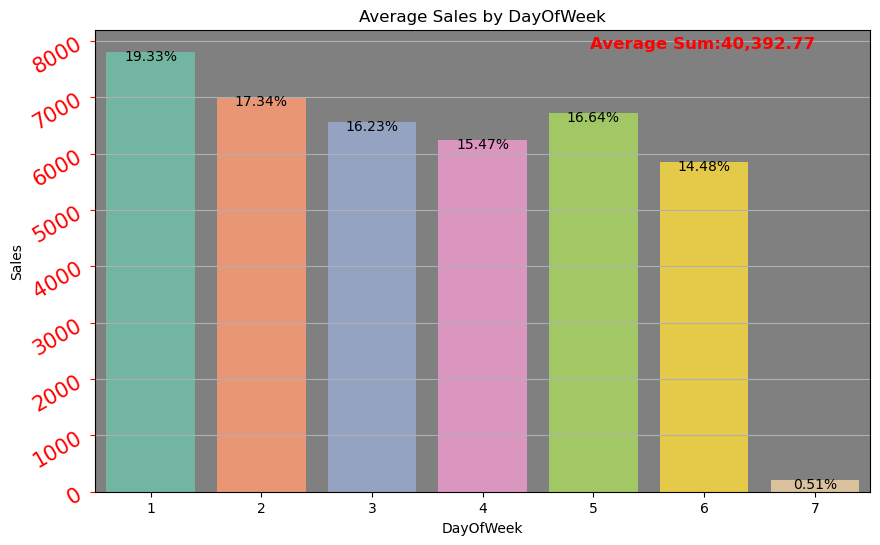

In [26]:
bivariate_cat_num("DayOfWeek")

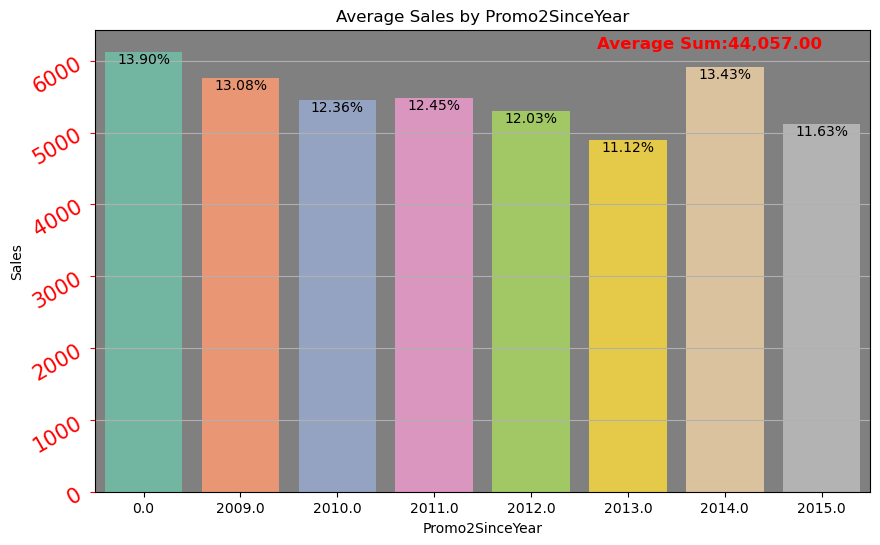

In [27]:
bivariate_cat_num("Promo2SinceYear")

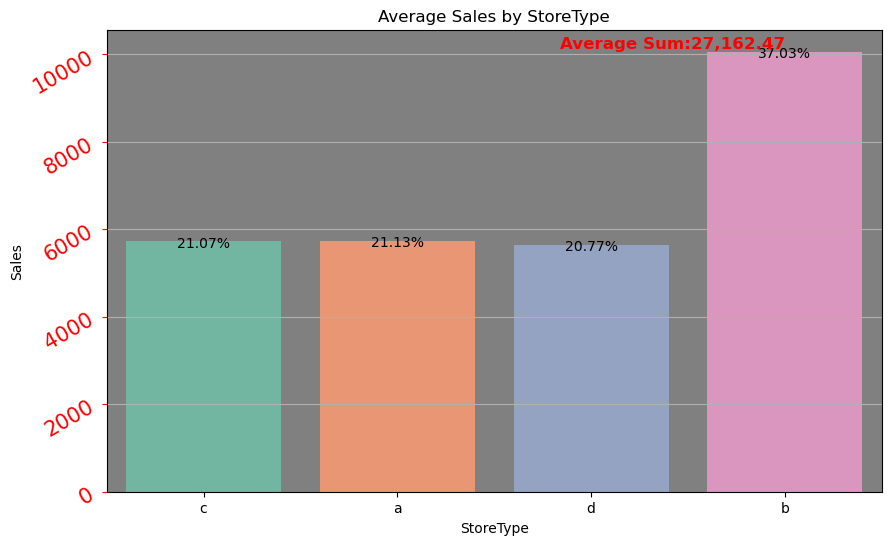

In [28]:
bivariate_cat_num("StoreType")

In [38]:
def f(col):
    g=merge_df.groupby(by=[col]).agg({"Sales":"sum"})
    p=g.Sales.sum()
    fig, ax= plt.subplots(figsize=(10, 6), facecolor="grey")
    ax.pie(x=g.Sales, labels=g.index ,wedgeprops=dict(width=0.25), radius=1,
                                    textprops={'size': 'large'} , autopct='%.1f%%',
          )
    #ax.patch.set_color("grey")
    ax.annotate("Total:", (-0.5, 0.2), fontsize=20, color="red")
    ax.annotate(f"{p:,}", (-0.5, 0), fontsize=20)
    plt.show()

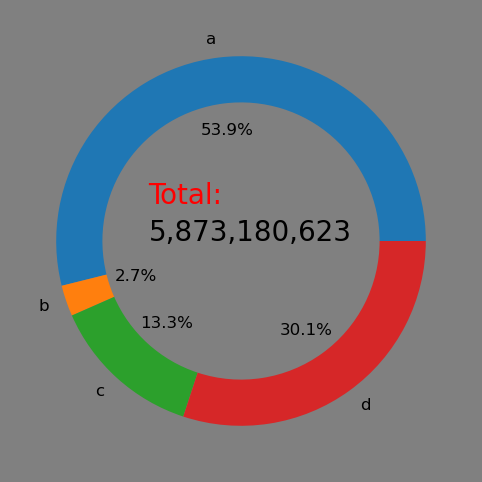

In [39]:
f("StoreType")

In [40]:
def Bivariate_cat_cat(col):
    e=merge_df.query("Open==1").groupby(by=[col]).agg({col:"count"}).rename(columns={col:"count of open"})
    ee=merge_df.query("Open==0").groupby(by=[col]).agg({col:"count"}).rename(columns={col:"count of close"})
    dd=e.merge(ee,right_index=True, left_index=True)

    # Width of the bars
    bar_width = 0.25

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # X locations for the groups
    r1 = np.arange(len(dd))
    r2 = [x + bar_width for x in r1]

    # Create bars
    bars1 = ax.bar(r1, dd["count of open"], width=bar_width, label='Open')
    bars2 = ax.bar(r2, dd["count of close"], width=bar_width, color="red", label='Close')

    # Add labels
    ax.set_xlabel('Category')
    ax.set_ylabel('Counts')
    ax.set_title(f'Counts of Open and Close by {col}')

    # Add xticks on the middle of the group bars
    ax.set_xticks([r + bar_width / 2 for r in range(len(dd))])
    ax.set_xticklabels(dd.index)

    # Add annotations
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:,}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, -5),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')

    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:,}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')

    # Add legend
    ax.legend(loc="center")
    ax.yaxis.grid()
    ax.patch.set_color("grey")
    # Show the plot
    plt.show()


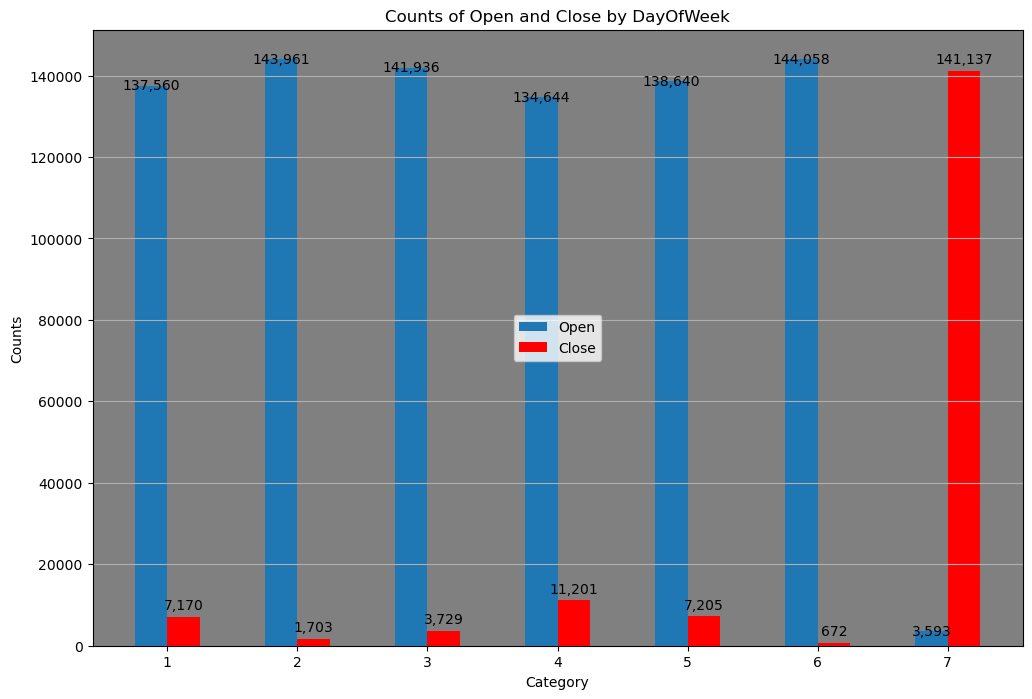

In [41]:
Bivariate_cat_cat("DayOfWeek")

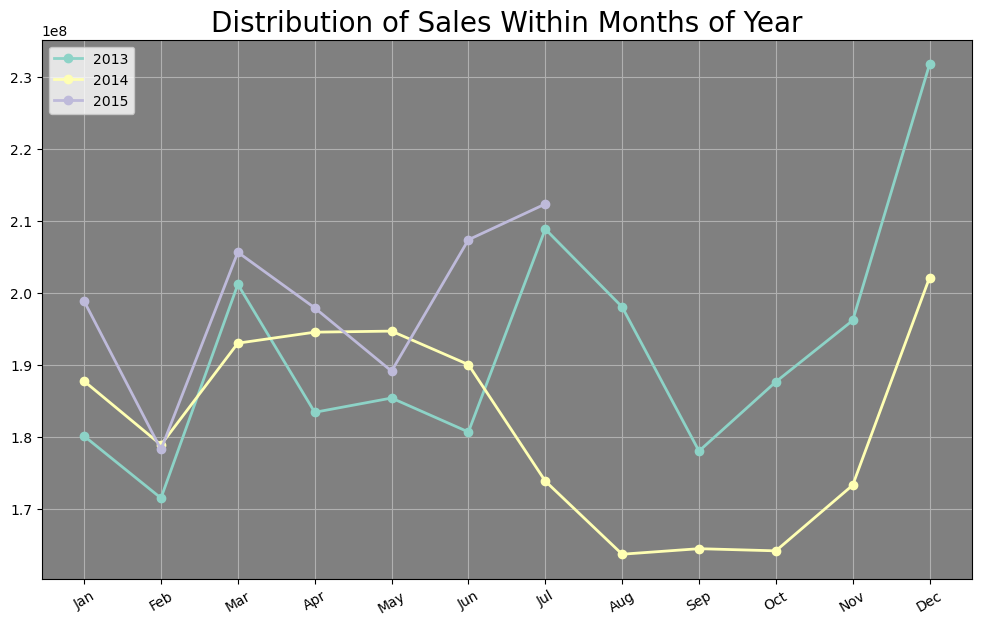

In [42]:
sales_2013=merge_df[merge_df["Year"]=="2013"].groupby(by=["Month"]).agg({"Sales":"sum"})
sales_2014=merge_df[merge_df["Year"]=="2014"].groupby(by=["Month"]).agg({"Sales":"sum"})
sales_2015=merge_df[merge_df["Year"]=="2015"].groupby(by=["Month"]).agg({"Sales":"sum"})
month_order= ["Jan", 'Feb', 'Mar','Apr', 'May',  'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']
sales_2013.index=pd.CategoricalIndex(data=sales_2013.index, categories=month_order, ordered=True)
sales_2014.index=pd.CategoricalIndex(data=sales_2014.index, categories=month_order, ordered=True)
sales_2015.index=pd.CategoricalIndex(data=sales_2015.index, categories=month_order, ordered=True)
sales_2013 = sales_2013.sort_index()
sales_2014 = sales_2014.sort_index()
sales_2015 = sales_2015.sort_index()
sns.set_palette("Set3")
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(sales_2013.index, sales_2013["Sales"], linewidth=2, marker="o", linestyle="-", label="2013")
ax.plot(sales_2014.index, sales_2014["Sales"], linewidth=2, marker="o", linestyle="-", label="2014")
ax.plot(sales_2015.index, sales_2015["Sales"], linewidth=2, marker="o", linestyle="-", label="2015")
ax.grid()
ax.legend()
plt.title("Distribution of Sales Within Months of Year", fontsize=20)
plt.xticks(rotation=30)
ax.patch.set_color("grey")
plt.show()

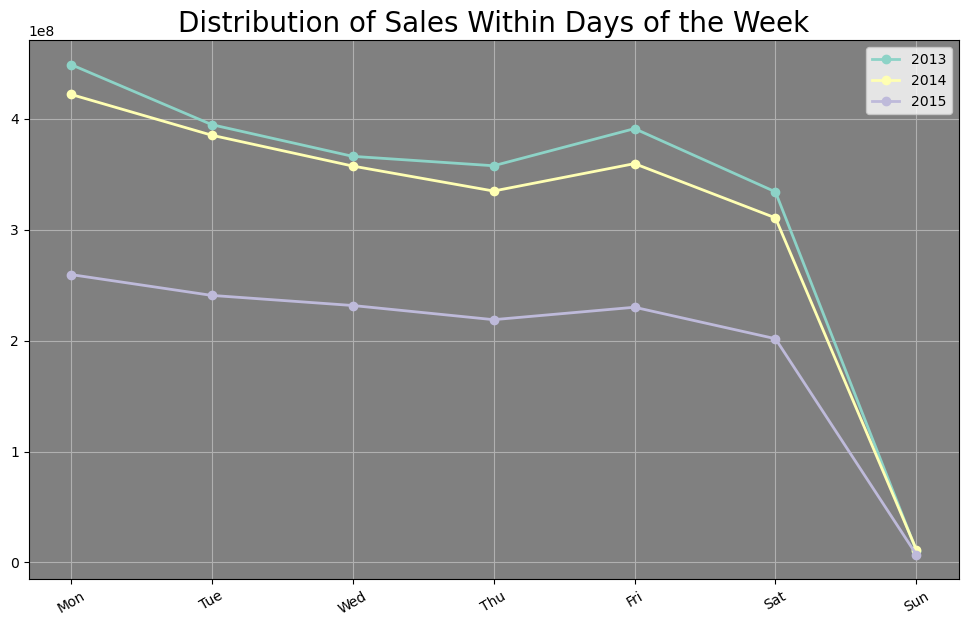

In [43]:
sales_2013=merge_df[merge_df["Year"]=="2013"].groupby(by=["Days"]).agg({"Sales":"sum"})
sales_2014=merge_df[merge_df["Year"]=="2014"].groupby(by=["Days"]).agg({"Sales":"sum"})
sales_2015=merge_df[merge_df["Year"]=="2015"].groupby(by=["Days"]).agg({"Sales":"sum"})
month_order= ["Mon", 'Tue', 'Wed','Thu', 'Fri',  'Sat', 'Sun']
sales_2013.index=pd.CategoricalIndex(data=sales_2013.index, categories=month_order, ordered=True)
sales_2014.index=pd.CategoricalIndex(data=sales_2014.index, categories=month_order, ordered=True)
sales_2015.index=pd.CategoricalIndex(data=sales_2015.index, categories=month_order, ordered=True)
sales_2013 = sales_2013.sort_index()
sales_2014 = sales_2014.sort_index()
sales_2015 = sales_2015.sort_index()
sns.set_palette("Set3")
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(sales_2013.index, sales_2013["Sales"], linewidth=2, marker="o", linestyle="-", label="2013")
ax.plot(sales_2014.index, sales_2014["Sales"], linewidth=2, marker="o", linestyle="-", label="2014")
ax.plot(sales_2015.index, sales_2015["Sales"], linewidth=2, marker="o", linestyle="-", label="2015")
ax.grid()
ax.legend()
plt.title("Distribution of Sales Within Days of the Week", fontsize=20)
plt.xticks(rotation=30)
ax.patch.set_color("grey")
plt.show()

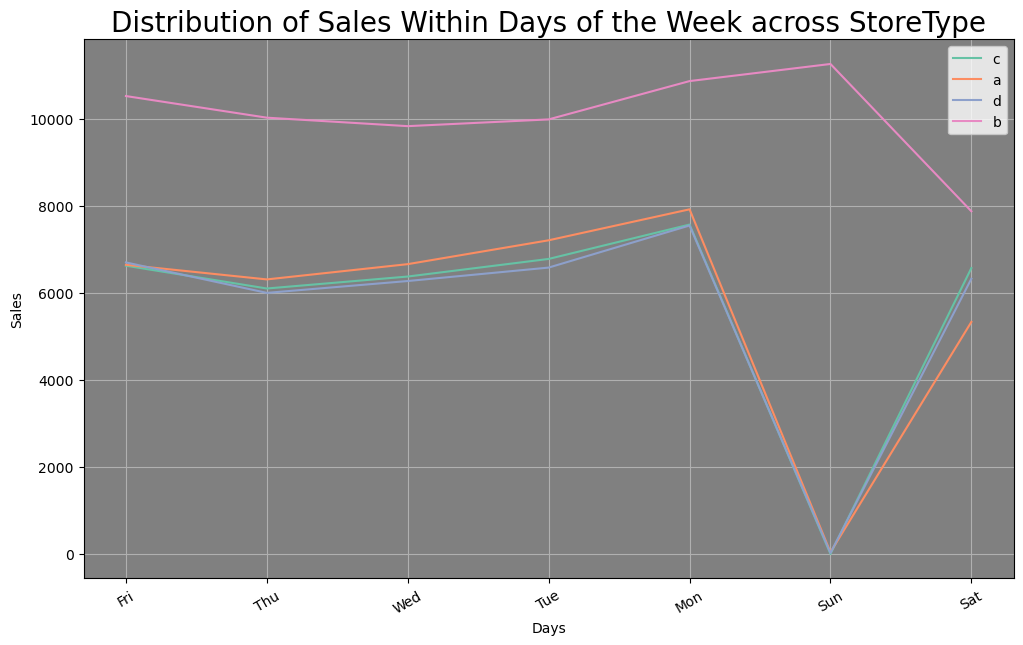

In [49]:
y= lambda x: np.sum(x)
fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(x=merge_df["Days"], y=merge_df["Sales"], ci=None, hue=merge_df.StoreType)
ax.grid()
ax.legend()
plt.title("Distribution of Sales Within Days of the Week across StoreType", fontsize=20)
plt.xticks(rotation=30)
ax.patch.set_color("grey")
plt.show()

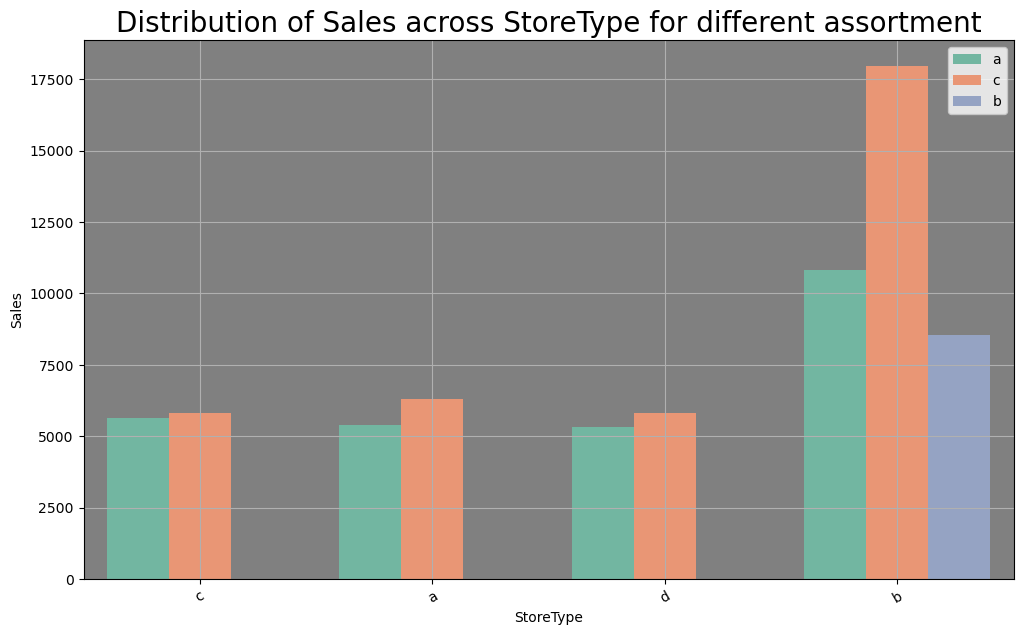

In [51]:
sns.set_palette("Set2")
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x=merge_df["StoreType"], y=merge_df["Sales"], hue=merge_df["Assortment"], ci=None)
ax.grid()
ax.legend()
plt.title("Distribution of Sales across StoreType for different assortment", fontsize=20)
plt.xticks(rotation=30)
ax.patch.set_color("grey")
plt.show()

# <center> <span id="title-one" style="color:#4CAF50"> Data Collection and Preprocessing</span> </center>